In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("online_retail.csv")


In [2]:
df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#checking unique
df["CustomerID"].nunique()

4372

In [5]:
df["CustomerID"].fillna(value= "NoCustomerID", inplace=True)

In [6]:
df["StockCode"].unique().all()

'23843'

In [7]:
df[df["StockCode"]=="22197"]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
221,221,536390,22197,SMALL POPCORN HOLDER,100,12/1/2010 10:19,0.72,17511.0,United Kingdom
393,393,536404,22197,SMALL POPCORN HOLDER,36,12/1/2010 11:29,0.85,16218.0,United Kingdom
532,532,536409,22197,SMALL POPCORN HOLDER,2,12/1/2010 11:45,0.85,17908.0,United Kingdom
610,610,536412,22197,SMALL POPCORN HOLDER,5,12/1/2010 11:49,0.85,17920.0,United Kingdom
804,804,536464,22197,SMALL POPCORN HOLDER,5,12/1/2010 12:23,0.85,17968.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540321,540321,581476,22197,POPCORN HOLDER,100,12/9/2011 8:48,0.72,12433.0,Norway
540785,540785,581492,22197,POPCORN HOLDER,34,12/9/2011 10:03,1.63,NoCustomerID,United Kingdom
541285,541285,581497,22197,POPCORN HOLDER,68,12/9/2011 10:23,2.46,NoCustomerID,United Kingdom
541678,541678,581538,22197,POPCORN HOLDER,4,12/9/2011 11:34,0.85,14446.0,United Kingdom


# checking shape

In [8]:
df.shape

(541909, 9)

In [9]:
df.info()
## checking if data has nulls and Data Types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   541909 non-null  object 
 8   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 37.2+ MB


In [10]:
df.describe()
## descrbing basic Statisitics of the dataframe, Quantity values cannot be negative... therefore need to drop the info on minimum such that minimum Quantity value >0 

,index,Quantity,UnitPrice
count,541909.00000,541909.000000,541909.000000
mean,270954.00000,9.552250,4.611114
std,156435.79785,218.081158,96.759853
min,0.00000,-80995.000000,-11062.060000
25%,135477.00000,1.000000,1.250000
50%,270954.00000,3.000000,2.080000
75%,406431.00000,10.000000,4.130000
max,541908.00000,80995.000000,38970.000000


In [11]:
df[df.duplicated()]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
print(f'there are {df.duplicated().sum()} duplicated values in dataset')

there are 0 duplicated values in dataset


In [13]:
df.isna().sum()
## checking and counting null values..

index             0
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,541909.0,270954.000000,156435.797850,0.00,135477.00,270954.00,406431.00,541908.0
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


##  Data Cleaning

In [15]:
df[df["UnitPrice"]<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NoCustomerID,United Kingdom
299984,299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NoCustomerID,United Kingdom


In [16]:
#cleaning UnitPrice below zero and Quantity (aslso for it..)
df=df[df["UnitPrice"]>0]

In [17]:
df[df["UnitPrice"]<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
df[df["Quantity"]<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540449,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [19]:
df=df[df["Quantity"]>0]

quantity clean

In [20]:
df[df["Quantity"]<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
UniqueCounts = df.nunique()
print(UniqueCounts)

index          530104
InvoiceNo       19960
StockCode        3922
Description      4026
Quantity          375
InvoiceDate     18499
UnitPrice        1291
CustomerID       4339
Country            38
dtype: int64


In [22]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [23]:
df.groupby(["Country"])["UnitPrice"].sum().sort_values(ascending=False)

Country
United Kingdom          1867568.034
EIRE                      38489.950
France                    36992.790
Germany                   33532.140
Singapore                 12949.990
Spain                      9504.340
Portugal                   8770.720
Belgium                    7372.850
Hong Kong                  6666.740
Switzerland                6634.360
Netherlands                6247.730
Norway                     5662.470
Finland                    3628.440
Australia                  3612.500
Italy                      3576.210
Cyprus                     3506.180
Channel Islands            3389.650
Sweden                     1695.790
Austria                    1693.900
Poland                     1377.210
Unspecified                1204.010
Denmark                    1195.550
Israel                     1070.980
Canada                      910.580
Greece                      663.290
Japan                       657.210
Malta                       545.190
Iceland             

In [24]:
df.groupby(["Country"])["UnitPrice"].sum().sort_values(ascending=False).reset_index()

,Country,UnitPrice
0,United Kingdom,1867568.034
1,EIRE,38489.950
2,France,36992.790
3,Germany,33532.140
4,Singapore,12949.990
5,Spain,9504.340
6,Portugal,8770.720
7,Belgium,7372.850
8,Hong Kong,6666.740
9,Switzerland,6634.360


In [76]:
df.groupby(["Country"])["Revenue"].sum().sort_values(ascending=False).reset_index().head(10)

,Country,Revenue
0,United Kingdom,8779568.884
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


In [26]:
top_10=df.groupby(["Country"])["UnitPrice"].sum().sort_values(ascending=False).reset_index().head(10)

<Axes: xlabel='UnitPrice', ylabel='Country'>

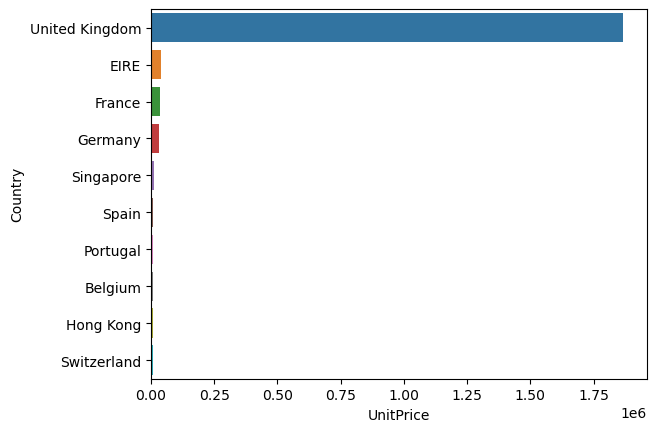

In [27]:
sns.barplot(data=top_10,y="Country",x="UnitPrice")

In [28]:
df["Description"].value_counts(ascending=True).reset_index().head(20)

,index,Description
0,"PAPER CRAFT , LITTLE BIRDIE",1
1,GOLD COSMETICS BAG WITH BUTTERFLY,1
2,BLUE/NAT SHELL NECKLACE W PENDANT,1
3,PINK/WHITE GLASS DEMI CHOKER,1
4,BLACK CHRISTMAS FLOCK DROPLET,1
5,PINK BERTIE MOBILE PHONE CHARM,1
6,S/4 BLACK DISCO PARTITION PANEL,1
7,IVORY PANTRY HANGING LAMP,1
8,CRYSTAL CHANDELIER T-LIGHT HOLDER,1
9,HAPPY BIRTHDAY CARD TEDDY/CAKE,1


Since here is defintelaye a sale, dropping cusomerID will impact total Quantiy and Price .. So I decided to leavCustomerID with NoID

In [29]:
df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

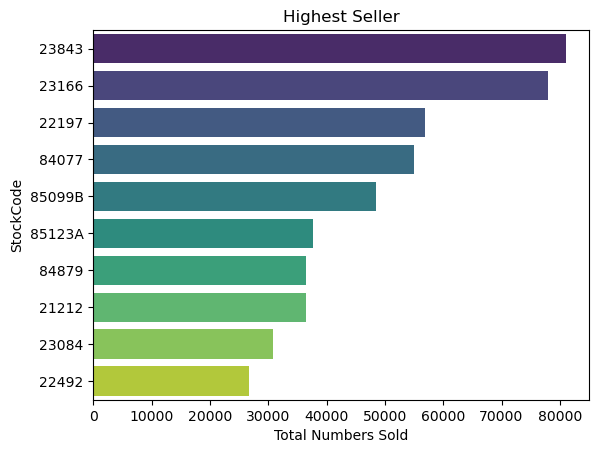

In [30]:
Highest_Seller=df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=Highest_Seller.values, y=Highest_Seller.index, palette='viridis')
plt.title('Highest Seller')
plt.xlabel('Total Numbers Sold')
plt.ylabel('StockCode')
plt.show()

checking the name of the stockCode sellling the most.. 

In [31]:
df[df["StockCode"]=="23843"]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [32]:
df.groupby('StockCode')['UnitPrice'].sum().sort_values(ascending=False).head(10)

StockCode
DOT          206248.77
M             74106.23
POST          34992.23
22423         28191.46
AMAZONFEE     13761.09
B             11062.06
47566          9885.03
22720          8155.18
85066          7561.21
22424          7241.53
Name: UnitPrice, dtype: float64

In [33]:
df["StockCode"].dtype

dtype('O')

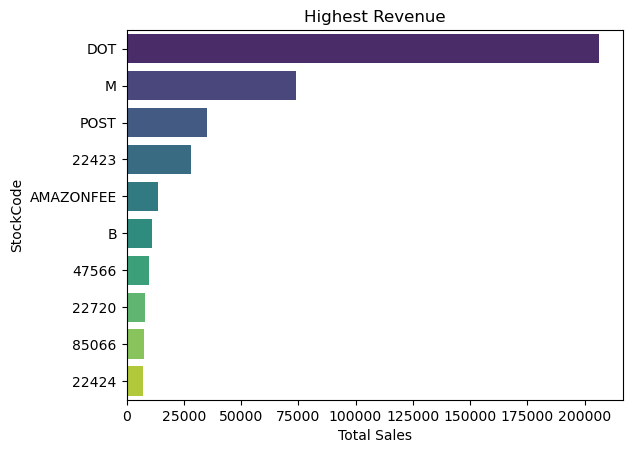

In [34]:

High_Revenue=df.groupby('StockCode')['UnitPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=High_Revenue.values, y=High_Revenue.index, palette='viridis')
plt.title('Highest Revenue')
plt.xlabel('Total Sales')
plt.ylabel('StockCode')
plt.show()

In [35]:
exclude=["BANK CHARGES","CRUK","POST","DOT","M","AMAZONFEE"]

In [36]:
fil_stock=df[~df["StockCode"].isin(exclude)]

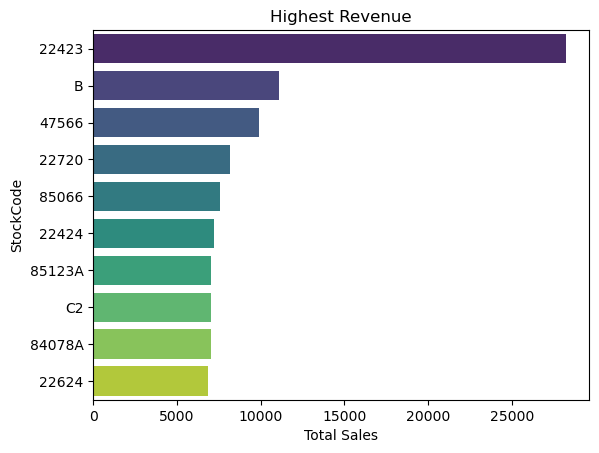

In [37]:
High_Revenue=fil_stock.groupby('StockCode')['UnitPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=High_Revenue.values, y=High_Revenue.index, palette='viridis')
plt.title('Highest Revenue')
plt.xlabel('Total Sales')
plt.ylabel('StockCode')
plt.show()

In [38]:
df[df["StockCode"]=="B"]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NoCustomerID,United Kingdom


In [39]:
df[df["StockCode"]=="22423"]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
880,880,536477,22423,REGENCY CAKESTAND 3 TIER,16,12/1/2010 12:27,10.95,16210.0,United Kingdom
936,936,536502,22423,REGENCY CAKESTAND 3 TIER,2,12/1/2010 12:36,12.75,16552.0,United Kingdom
1092,1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,12/1/2010 12:54,12.75,14078.0,United Kingdom
1155,1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,12/1/2010 13:17,12.75,15525.0,United Kingdom
1197,1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,12/1/2010 13:21,12.75,17905.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
539891,539891,581449,22423,REGENCY CAKESTAND 3 TIER,1,12/8/2011 17:37,12.75,12748.0,United Kingdom
539892,539892,581449,22423,REGENCY CAKESTAND 3 TIER,1,12/8/2011 17:37,12.75,12748.0,United Kingdom
540216,540216,581472,22423,REGENCY CAKESTAND 3 TIER,2,12/8/2011 19:55,12.75,15796.0,United Kingdom
541231,541231,581495,22423,REGENCY CAKESTAND 3 TIER,10,12/9/2011 10:20,12.75,14051.0,United Kingdom


In [40]:
df[df["StockCode"]=="M"]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom
2250,2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom
5684,5684,536865,M,Manual,1,12/3/2010 11:28,2.55,NoCustomerID,United Kingdom
6798,6798,536981,M,Manual,2,12/3/2010 14:26,0.85,14723.0,United Kingdom
7976,7976,537077,M,Manual,12,12/5/2010 11:59,0.42,17062.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
526015,526015,580645,M,Manual,1,12/5/2011 13:11,219.50,17857.0,United Kingdom
526018,526018,580646,M,Manual,800,12/5/2011 13:13,0.25,17857.0,United Kingdom
530876,530876,580884,M,Manual,1,12/6/2011 12:21,0.85,15907.0,United Kingdom
531432,531432,580956,M,Manual,4,12/6/2011 14:23,1.25,17841.0,United Kingdom


In [41]:
df[df["CustomerID"].isnull()]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


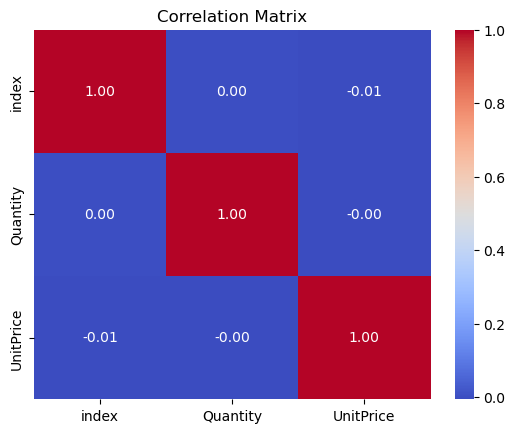

In [42]:
# What is the correlation between all the variables
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.dropna(inplace=True)
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
df.describe()

,index,Quantity,UnitPrice
count,530104.000000,530104.000000,530104.000000
mean,271365.705603,10.542037,3.907625
std,156559.013587,155.524124,35.915681
min,0.000000,1.000000,0.001000
25%,135688.750000,1.000000,1.250000
50%,271600.500000,3.000000,2.080000
75%,407182.250000,10.000000,4.130000
max,541908.000000,80995.000000,13541.330000


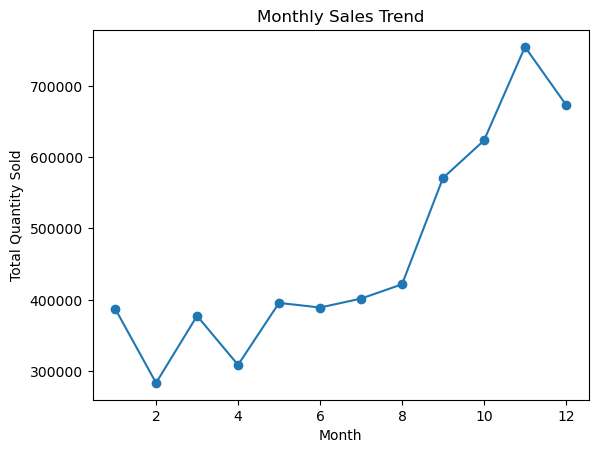

In [44]:
# Explore the time trend of the data (before removing Outlier Price Quantity)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['Quantity'].sum()
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

<Axes: >

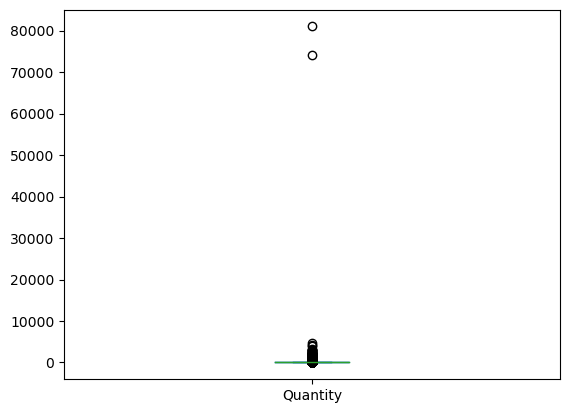

In [45]:
#checking outliers for Quantity
df["Quantity"].plot(kind="box")

In [46]:
#remove outliedf[df["Quantity"]>40000]

In [47]:
#remove outlier
df=df[df["Quantity"]<40000]

In [48]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [49]:
df.shape

(530102, 10)

In [50]:
#When Px Q = Revenue. Creating new feature Revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [51]:
df=df.assign(Revenue=df["Quantity"] * df["UnitPrice"] )

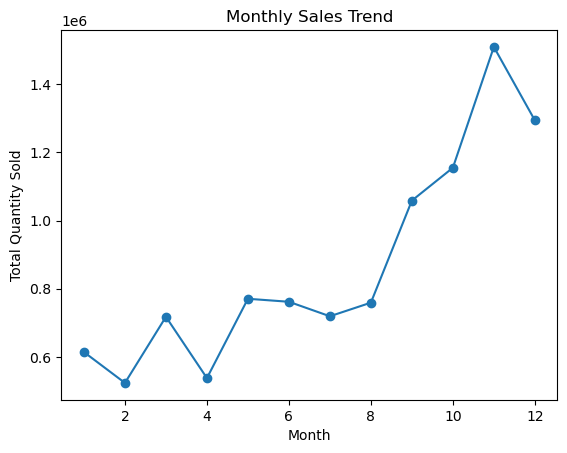

In [77]:
# Explore the time trend of the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['Revenue'].sum()
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

<Axes: >

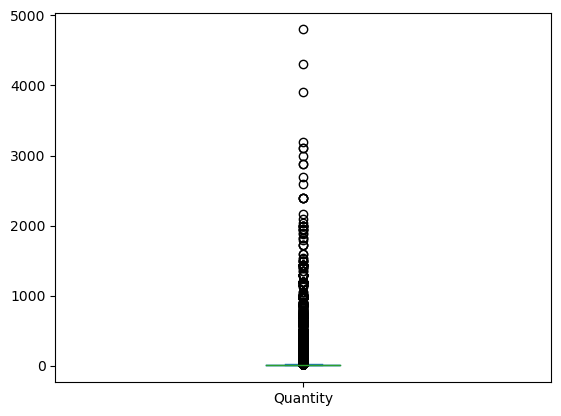

In [53]:
#checking outliers After removing Quantity
df["Quantity"].plot(kind="box")

<Axes: >

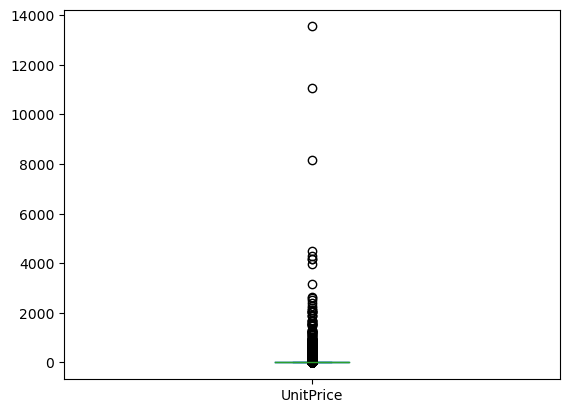

In [54]:
#checking outliers for Price
df["UnitPrice"].plot(kind="box")

In [55]:
df.groupby(["Country"])["UnitPrice"].sum().sort_values(ascending=False)

Country
United Kingdom          1867564.914
EIRE                      38489.950
France                    36992.790
Germany                   33532.140
Singapore                 12949.990
Spain                      9504.340
Portugal                   8770.720
Belgium                    7372.850
Hong Kong                  6666.740
Switzerland                6634.360
Netherlands                6247.730
Norway                     5662.470
Finland                    3628.440
Australia                  3612.500
Italy                      3576.210
Cyprus                     3506.180
Channel Islands            3389.650
Sweden                     1695.790
Austria                    1693.900
Poland                     1377.210
Unspecified                1204.010
Denmark                    1195.550
Israel                     1070.980
Canada                      910.580
Greece                      663.290
Japan                       657.210
Malta                       545.190
Iceland             

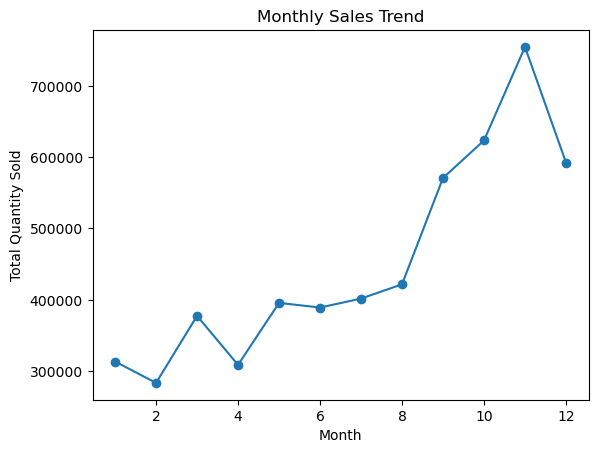

In [56]:
# Explore the time trend of the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['Quantity'].sum()
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

In [57]:
result = df[df["CustomerID"] == "NoCustomerID"].groupby('Country').size()

In [58]:
print(result)

Country
Bahrain                1
EIRE                 654
France                66
Hong Kong            284
Israel                47
Portugal              39
Switzerland          125
United Kingdom    130802
Unspecified          202
dtype: int64


In [59]:
result = df[df["CustomerID"] == "NoCustomerID"].groupby('UnitPrice').size()

In [60]:
print(result)

UnitPrice
0.06         4
0.12         3
0.19        12
0.20         2
0.21        33
            ..
2653.95      1
4287.63      1
4505.17      1
11062.06     1
13541.33     1
Length: 1013, dtype: int64


In [61]:
fil_stock2=df[~df["StockCode"].isin(exclude)]

In [62]:
fil_stock2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Revenue
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [63]:
result = fil_stock2[fil_stock2["CustomerID"] == "NoCustomerID"].groupby('StockCode').size()

In [64]:
print(result)

StockCode
10002           22
10080            1
10125           30
10133           74
10135           58
                ..
gift_0001_20     9
gift_0001_30     7
gift_0001_40     3
gift_0001_50     4
m                1
Length: 3404, dtype: int64


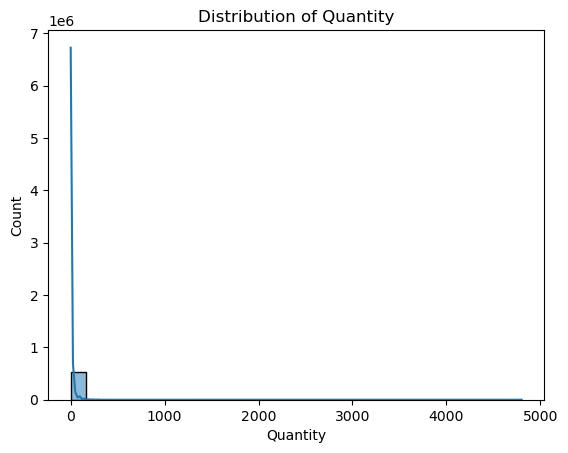

In [65]:
#explore QuNITY DISTRIBUTION
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.show()

In [66]:
#plot this simalr to StockCode above, to show how Revenue per Country looks like
df.groupby(["Country"])["Revenue"].sum().sort_values(ascending=False)

Country
United Kingdom          8779568.884
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

<Axes: title={'center': 'Country with highest Online transactions in %'}>

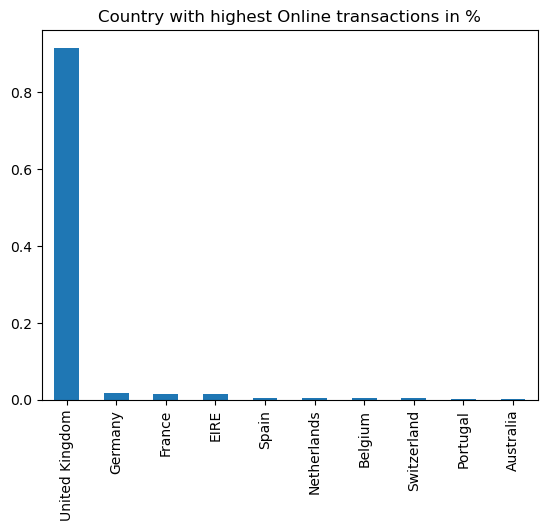

In [75]:
## Which country is doing highest percentage of online trasactions
df["Country"].value_counts(normalize=True).round(4)\
.head(10) \
.plot(kind = 'bar', title = 'Country with highest Online transactions in %')